In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Knowing the customer churn rate is a key indicator for any business. According to a study by Bain & Company, improving the customer retention rate for existing customers by just 5 percent can improve a company’s profitability by 25 to 95 percent.

- In this article, we are going to look at the following:

    Initial Exploratory Data Analysis
    Predicting the churn rate for a customer and classify them by learning about different classification algorithms.
    Comparing and evaluating different algorithms based on its performance.
    And once we have our best model, we would perform optimization.

In [2]:
df= pd.read_csv('Churn Modeling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Checking null values
- There are no missing values

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.nunique(), df.shape

(RowNumber          10000
 CustomerId         10000
 Surname             2932
 CreditScore          460
 Geography              3
 Gender                 2
 Age                   70
 Tenure                11
 Balance             6382
 NumOfProducts          4
 HasCrCard              2
 IsActiveMember         2
 EstimatedSalary     9999
 Exited                 2
 dtype: int64,
 (10000, 14))

<AxesSubplot:xlabel='Geography', ylabel='count'>

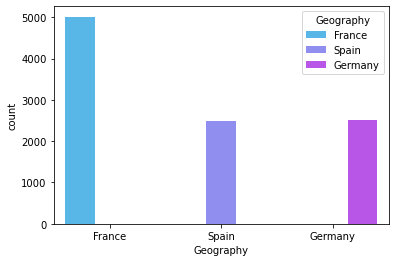

In [6]:
sns.countplot(x= 'Geography', data=df, hue='Geography', palette='cool')

<AxesSubplot:xlabel='Geography', ylabel='count'>

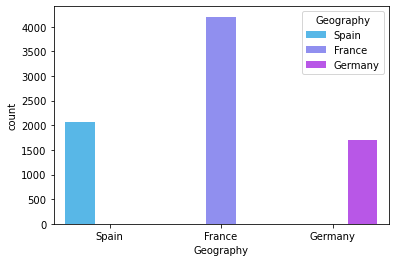

In [7]:
sns.countplot(x= 'Geography', data=df[df['Exited'] == 0], hue='Geography', palette='cool')

<AxesSubplot:xlabel='Geography', ylabel='count'>

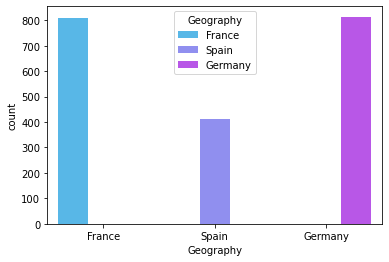

In [8]:
sns.countplot(x= 'Geography', data=df[df['Exited'] == 1], hue='Geography', palette='cool')

- Germany has more no of exits

<AxesSubplot:xlabel='Gender', ylabel='count'>

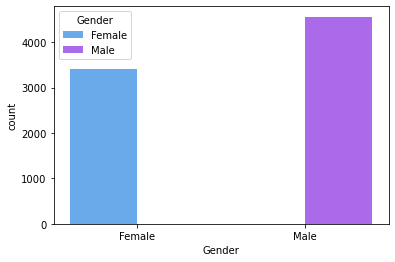

In [9]:
sns.countplot(x= 'Gender', data=df[df['Exited'] == 0], hue='Gender', palette='cool')

<AxesSubplot:xlabel='Gender', ylabel='count'>

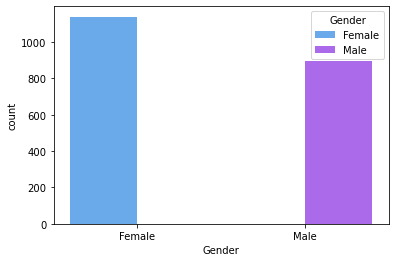

In [10]:
sns.countplot(x= 'Gender', data=df[df['Exited'] == 1], hue='Gender', palette='cool')

- Female has more exits

<AxesSubplot:xlabel='Gender', ylabel='count'>

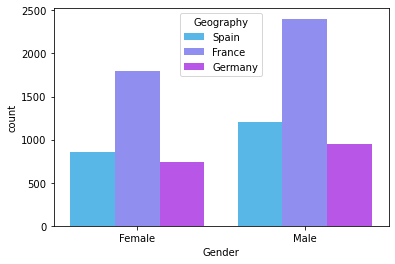

In [11]:
sns.countplot(x= 'Gender', data=df[df['Exited'] == 0], hue='Geography', palette='cool')

<AxesSubplot:xlabel='Gender', ylabel='count'>

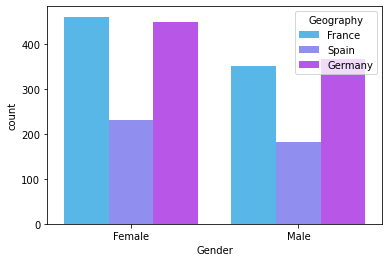

In [12]:
sns.countplot(x= 'Gender', data=df[df['Exited'] == 1], hue='Geography', palette='cool')

- Female from France and Germany exited a lot than from Spain
- Male from France and Germany exited a lot than from Spain
- Looks like a linear relationship between them

<AxesSubplot:xlabel='Tenure', ylabel='count'>

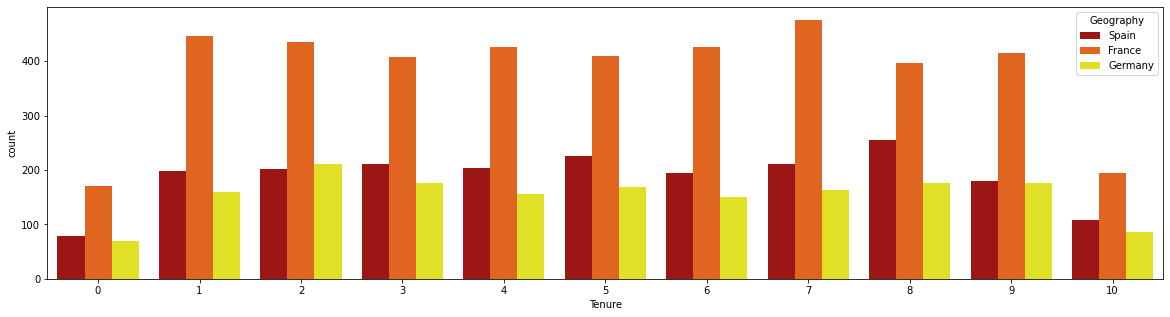

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(x= 'Tenure', data=df[df['Exited'] == 0], hue='Geography', palette='hot')

<AxesSubplot:xlabel='Tenure', ylabel='count'>

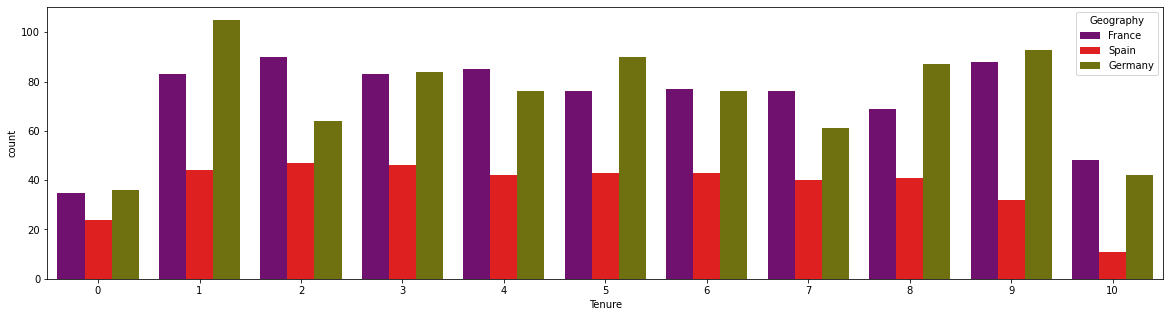

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x= 'Tenure', data=df[df['Exited'] == 1], hue='Geography', palette='brg')

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

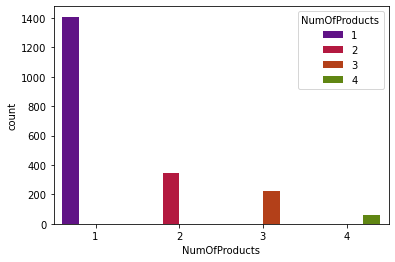

In [15]:
sns.countplot(x= 'NumOfProducts', data=df[df['Exited'] == 1], hue='NumOfProducts', palette='brg')

- People with less NumOfProducts tend to leave the bank

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

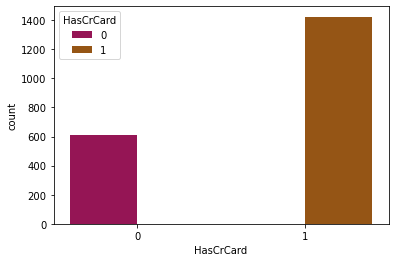

In [16]:
sns.countplot(x= 'HasCrCard', data=df[df['Exited'] == 1], hue='HasCrCard', palette='brg')

- Poople with credit card are more likely to leave the bank

C:\Users\91832\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Age mean: 38.9218
Age median: 37.0
Age mode: 0    37
dtype: int64
Age kurtosis: 1.3953470615086956
Age skew: 1.0113202630234552


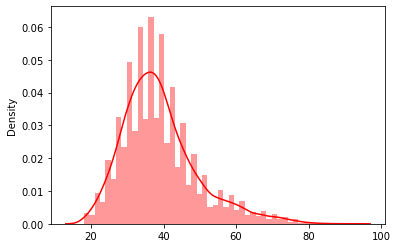

In [17]:
sns.distplot(x= df.Age, color='r')
print('Age mean:', df.Age.mean())
print('Age median:', df.Age.median())
print('Age mode:', df.Age.mode())
print('Age kurtosis:', df.Age.kurtosis())
print('Age skew:', df.Age.skew())

In [18]:
df.Age= np.log1p(df.Age)

C:\Users\91832\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Balance mean: 76485.88928799961
Balance median: 97198.54000000001
Balance mode: 0    0.0
dtype: float64
Balance kurtosis: -1.489411767941925
Balance skew: -0.14110871094154384


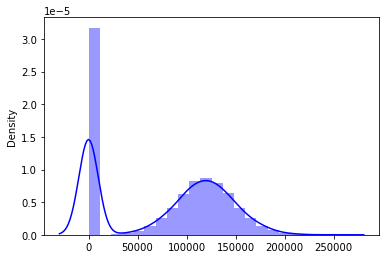

In [19]:
sns.distplot(x= df.Balance, color='b')
print('Balance mean:', df.Balance.mean())
print('Balance median:', df.Balance.median())
print('Balance mode:', df.Balance.mode())
print('Balance kurtosis:', df.Balance.kurtosis())
print('Balance skew:', df.Balance.skew())

C:\Users\91832\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

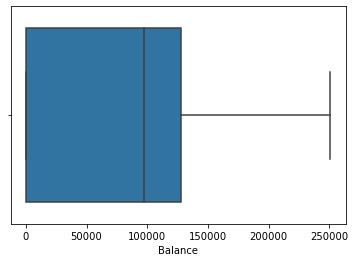

In [20]:
sns.boxplot(df.Balance)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

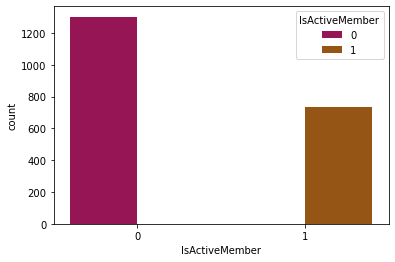

In [21]:
sns.countplot(x= 'IsActiveMember', data=df[df['Exited'] == 1], hue='IsActiveMember', palette='brg')

- Non active member tend to leave the bank

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

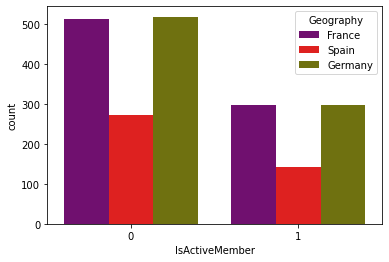

In [22]:
sns.countplot(x= 'IsActiveMember', data=df[df['Exited'] == 1], hue='Geography', palette='brg')

- Germany and France have most non active members

<AxesSubplot:>

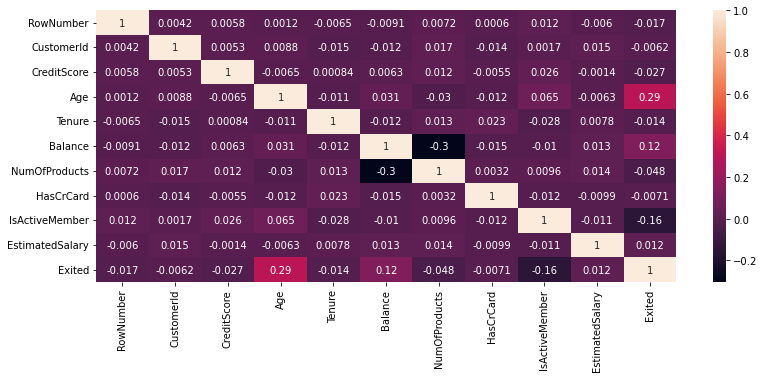

In [23]:
plt.figure(figsize=(13,5))
sns.heatmap(df.corr(), annot=True)

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,3.761200,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,3.737670,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,3.761200,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,3.688879,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,3.784190,2,125510.82,1,1,1,79084.10,0


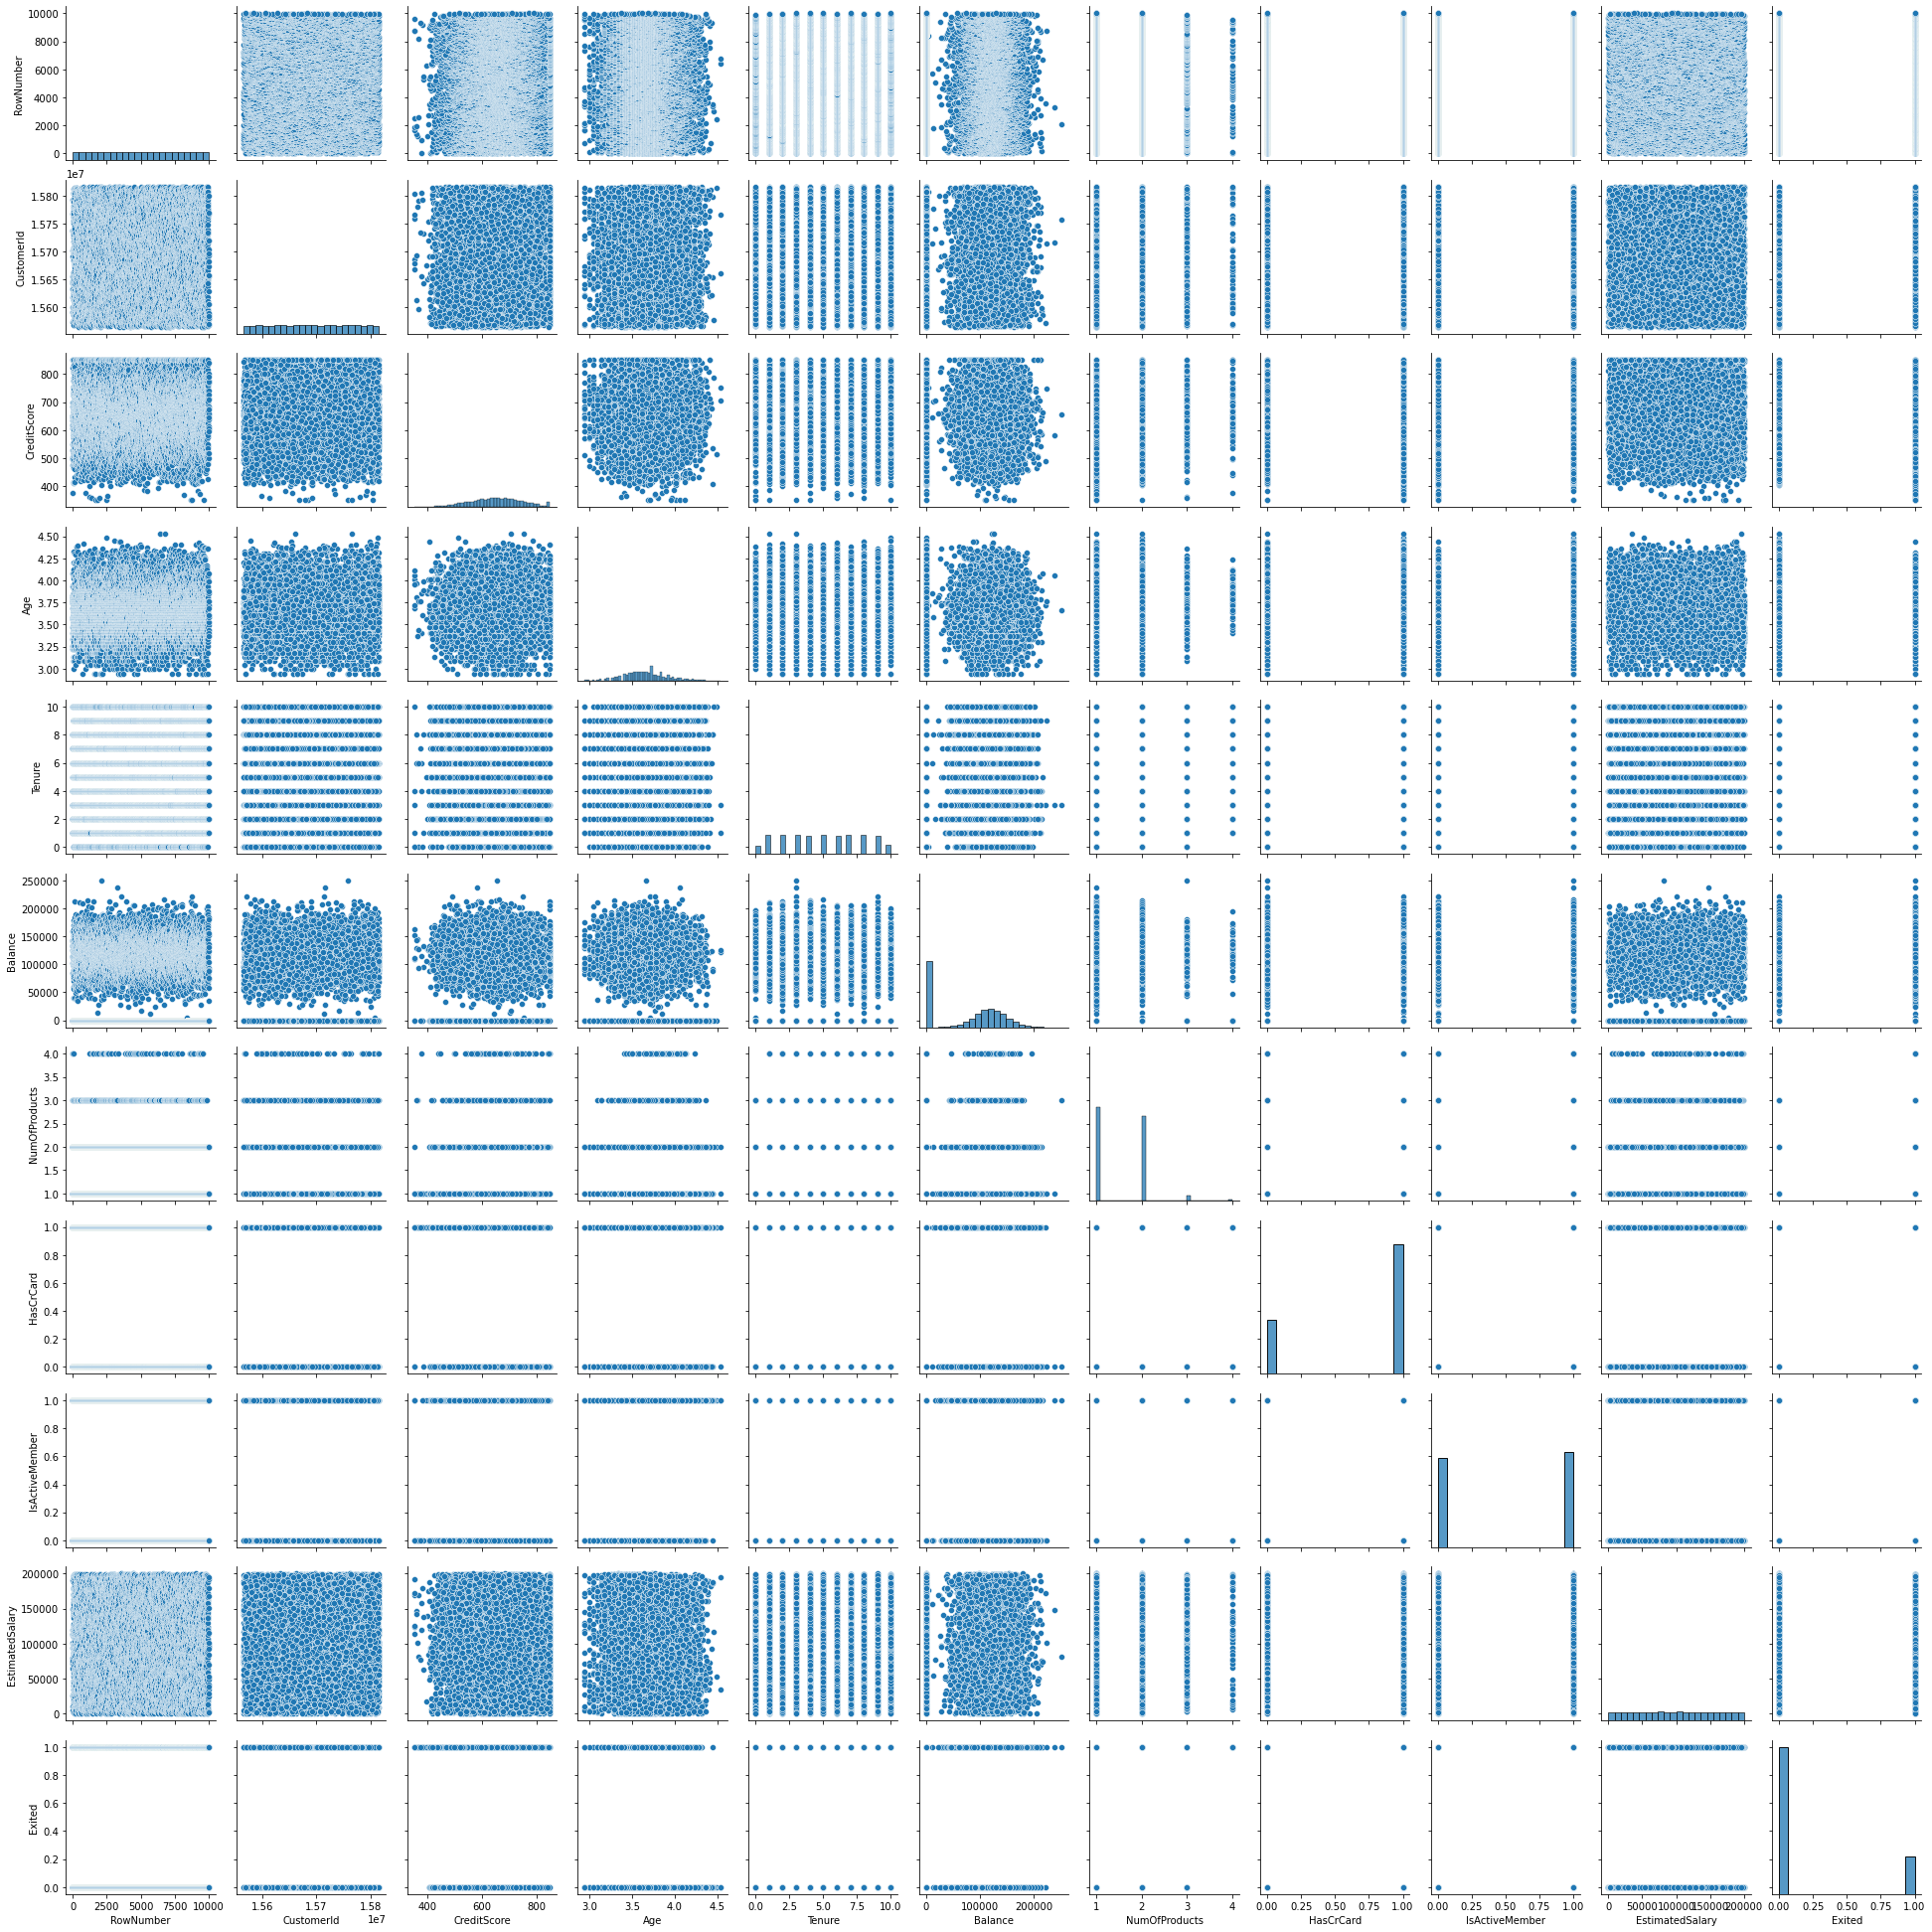

In [25]:
sns.pairplot(df)

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,3.761200,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,3.737670,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,3.761200,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,3.688879,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,3.784190,2,125510.82,1,1,1,79084.10,0


In [27]:
df = df.drop('RowNumber', axis=1)

In [28]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- Creating features with Surname so I can remove that feature

In [29]:
df['family_members_in_bank']= df.groupby(['Surname'])['CustomerId'].transform('count')

In [30]:
geo= pd.get_dummies(df.Geography, prefix='country_', drop_first=True)
df= df.drop('Geography', axis=1)
df= pd.concat([df, geo], axis=1)

In [31]:
df.Gender= df.Gender.map({'Female': 0, 'Male': 1})

In [34]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,family_members_in_bank,country__Germany,country__Spain
0,15634602,619,0,3.761200,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,3.737670,1,83807.86,1,0,1,112542.58,0,17,0,1
2,15619304,502,0,3.761200,8,159660.80,3,1,0,113931.57,1,8,0,0
3,15701354,699,0,3.688879,1,0.00,2,0,0,93826.63,0,14,0,0
4,15737888,850,0,3.784190,2,125510.82,1,1,1,79084.10,0,20,0,1


In [33]:
df= df.drop('Surname', axis=1)

In [35]:
df.to_csv('cleaned_dataset.csv')